In [9]:
import xml.etree.ElementTree as ET
from collections import defaultdict, Counter
import re

import os

In [6]:
def clean_text(text):
    text = text.replace('<email/>', '')

    text = re.sub(r'http\S+|www\S+', '', text)

    text = re.sub(r'(.)\1{3,}', r'\1\1', text)

    text = re.sub(r'[^a-zA-Z0-9\s.,!?\'"]+', '', text)

    text = re.sub(r'\s+', ' ', text)

    return text.strip()

In [7]:
def load_conversations(xml_file, predator_ids=None):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    conversations = []
    for conv in root.findall('conversation'):
        conv_id = conv.attrib.get('id', None)
        messages = []
        authors_in_conv = set()
        for message in conv.findall('message'):
            author_elem = message.find('author')
            text_elem = message.find('text')
            author = author_elem.text.strip() if author_elem is not None and author_elem.text else 'UNKNOWN'
            text = text_elem.text.strip() if text_elem is not None and text_elem.text else ''
            if text:
                messages.append((author, text))
                authors_in_conv.add(author)
        if messages:
            label = 1 if predator_ids and authors_in_conv.intersection(predator_ids) else 0
            conversations.append({'id': conv_id, 'messages': messages, 'label': label})
    return conversations

In [8]:
def prepare_data(conversations):
    texts = []
    labels = []
    ids = []
    for conv in conversations:
        conversation_text = ' '.join([clean_text(text) for _, text in conv['messages']])
        texts.append(conversation_text)
        labels.append(conv['label'])
        ids.append(conv['id'])
    return texts, labels, ids

In [10]:
def load_predator_ids(predator_file):
    with open(predator_file, 'r', encoding='utf-8') as f:
        predators = {line.strip() for line in f if line.strip()}
    return predators

In [12]:
DATA_DIR = 'data/training'
XML_FILE = os.path.join(DATA_DIR, 'pan12-sexual-predator-identification-training-corpus-2012-05-01.xml')
PREDATOR_FILE = os.path.join(DATA_DIR, 'pan12-sexual-predator-identification-training-corpus-predators-2012-05-01.txt')

predator_ids = load_predator_ids(PREDATOR_FILE)
conversations = load_conversations(XML_FILE, predator_ids)

texts, labels, ids = prepare_data(conversations)



In [14]:
ids[0]

'e621da5de598c9321a1d505ea95e6a2d'

In [13]:
texts[0]

'Hola. hi. whats up? not a ton. you? same. being lazy. M or f? F. Ditto, Iaposve done absolutely nothing with my day besides watching stuff on Hulu. M here. Just got home from weekend trip. Tired. Oh, cool. Family thing? yeah. a amp l? Gotta love those. 17, Hawaii. and yourself? Uh oh. older. 30 Been to Hawaii. whoops xD Itaposs nice, isnapost it? Yeah. Always enjoy visiting. Which Island you on Oahu? married? iaposm assuming since you went on a aposfamilyapos trip p yeah. Just found this site a few days ago. Yeah, Oahu. Curious to the whole quotrandom thingquot Pretty crazy the individuals you meet, isnapost it? Itaposs been eye opening for sure. Yeah, I hear you. Iaposm pretty open to meettalk to anyone. But pretty clear what most are looking for on this site, it seems. Half the people that strike up a conversation only seem to be interested in more. . risque topics. What more do you expect though, ya know? Yep. Itaposs the internet. You seem to take it pretty well. Pardon? I just me

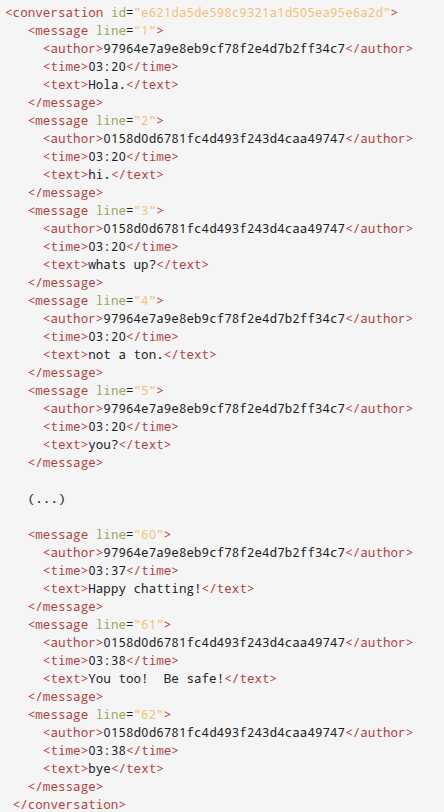